In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

 #### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [445]:
customer = pd.read_csv("Customer.csv" )
prod_cat = pd.read_csv("prod_cat_info.csv")
transaction = pd.read_csv("Transactions.csv")


In [446]:
customer_final= transaction.merge(customer, left_on='cust_id', right_on='customer_Id', how='left')


### 2. Prepare a summary report for the merged data set.


#### a. Get the column names and their corresponding data types

In [426]:
customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

#### b. Top/Bottom 10 observations

In [427]:
customer_final.head(10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,273420,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,272357,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,273667,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,271489,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,275108,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,269014,27-11-1979,F,3.0


In [428]:
customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,271982,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,273982,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,273031,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,272049,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,266866,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,274550,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,270022,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,271020,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,270911,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,271961,15-01-1982,M,1.0


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max

In [429]:

min_ = customer_final[["Qty","Rate","Tax","total_amt"]].min()
max_ = customer_final[["Qty","Rate","Tax","total_amt"]].max()
median = customer_final[["Qty","Rate","Tax","total_amt"]].median()
Q1 =customer_final[["Qty","Rate","Tax","total_amt"]].quantile(0.25)
Q3 = customer_final[["Qty","Rate","Tax","total_amt"]].quantile(0.75)
five_number_summary = pd.concat([min_, Q1, median, Q3, max_], axis=1)
five_number_summary.columns = ['min', 'Q1', 'median', 'Q3', 'max']
five_number_summary

,min,Q1,median,Q3,max
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5


#### d. Frequency tables for all the categorical variables

In [430]:
categorical=customer_final[['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code','prod_cat_code',  'Store_type','customer_Id', 'DOB', 'Gender', 'city_code']]
Frequency = categorical.count()
Frequency

transaction_id      23053
cust_id             23053
tran_date           23053
prod_subcat_code    23053
prod_cat_code       23053
Store_type          23053
customer_Id         23053
DOB                 23053
Gender              23044
city_code           23045
dtype: int64

### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

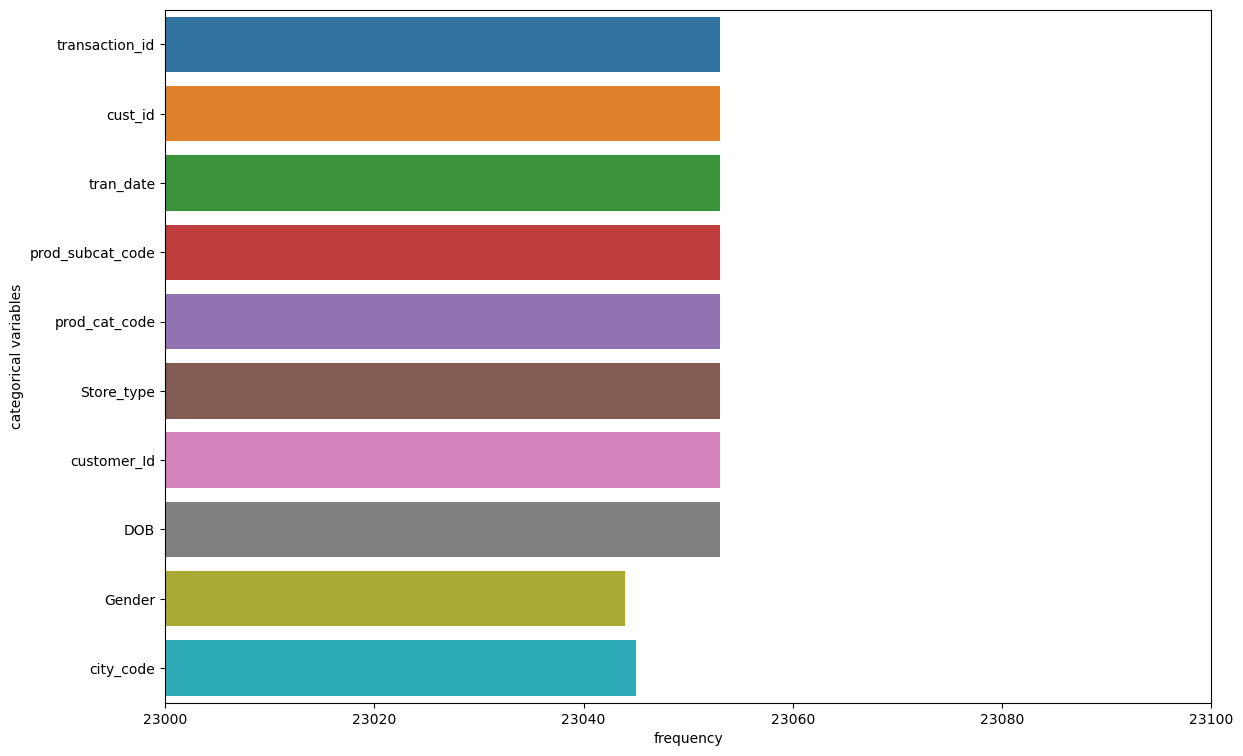

In [431]:
plt.figure(figsize = (13.5,9))
sns.barplot( y = Frequency.index ,x  = Frequency , orient = "horizontal")
plt.xlim(23000, 23100)
plt.xlabel('frequency')
plt.ylabel('categorical variables')
plt.show()

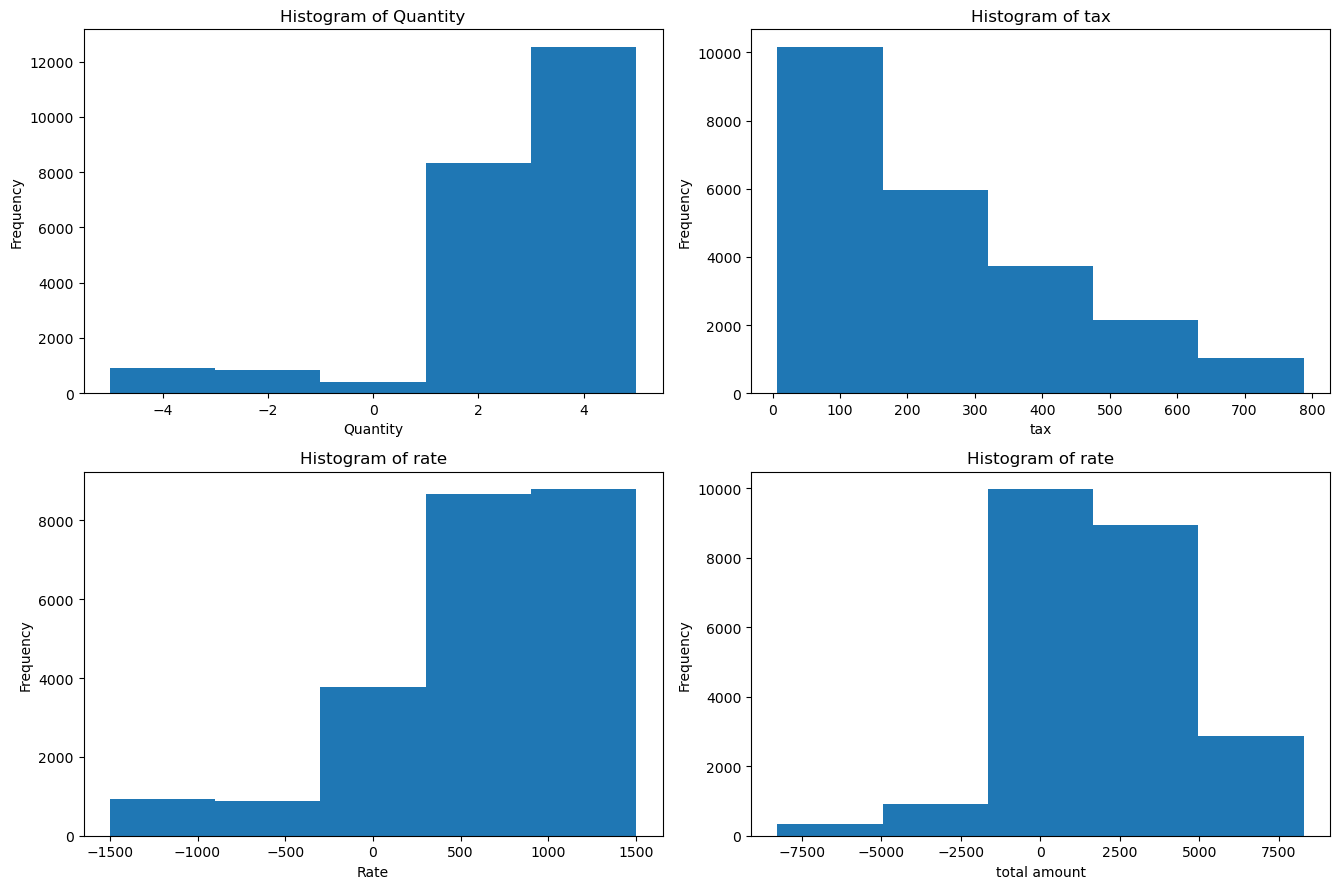

In [432]:
plt.figure(figsize= (13.5,9))
plt.subplot(2,2,1)
plt.hist(customer_final["Qty"], bins=5)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Histogram of Quantity')

plt.subplot(2,2,2)
plt.hist(customer_final["Tax"], bins=5)
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.title('Histogram of tax')


plt.subplot(2,2,3)
plt.hist(customer_final["Rate"], bins=5)
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Histogram of rate')


plt.subplot(2,2,4)
plt.hist(customer_final["total_amt"], bins=5)
plt.xlabel('total amount')
plt.ylabel('Frequency')
plt.title('Histogram of rate')
plt.tight_layout()
plt.show()


### 4. Calculate the following information using the merged dataset :

#### a. Time period of the available transaction data


In [433]:
customer_final["tran_date"] =customer_final["tran_date"].str.replace("-", "/")
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'],format ="%d/%m/%Y", )


In [434]:

start_date = customer_final["tran_date"].min().date()
end_date= customer_final["tran_date"].max().date()

print("Time period:", start_date, "to", end_date)

Time period: 2011-01-25 to 2014-02-28


#### b. Count of transactions where the total amount of transaction was negative


In [435]:
negative_transaction = (customer_final["total_amt"] < 0).sum()
print(f"Count of transactions where the total amount of transaction was negative : {negative_transaction}")

Count of transactions where the total amount of transaction was negative : 2177


### 5. Analyze which product categories are more popular among females vs male customers.


In [436]:
# product category 
product_category  = prod_cat[["prod_cat_code","prod_cat"]].drop_duplicates().reset_index(drop = True)
product_category.set_index("prod_cat_code", inplace = True)

# categories popular in male and female
male = customer_final[customer_final["Gender"] == "M"]
female = customer_final[customer_final["Gender"] == "F"]
popular_male = male.groupby("prod_cat_code")["Gender"].count().sort_values(ascending = False)
popular_female  = female.groupby("prod_cat_code")["Gender"].count().sort_values(ascending = False)
popular_male = popular_male.to_frame(name = "counts").reset_index()
popular_female = popular_female.to_frame(name = "counts").reset_index()
# mapping categories to counts 
popular_male['prod_cat'] = popular_male['prod_cat_code'].map(product_category['prod_cat'])
popular_female['prod_cat'] = popular_female['prod_cat_code'].map(product_category['prod_cat'])

print(f" poduct categories popular among males : \n  {popular_male}")
print(f" poduct categories popular among females : \n {popular_female}")

 poduct categories popular among males : 
     prod_cat_code  counts          prod_cat
0              5    3116             Books
1              3    2570       Electronics
2              6    2134  Home and kitchen
3              1    1518          Clothing
4              2    1469          Footwear
5              4    1004              Bags
 poduct categories popular among females : 
    prod_cat_code  counts          prod_cat
0              5    2949             Books
1              3    2328       Electronics
2              6    1994  Home and kitchen
3              2    1529          Footwear
4              1    1439          Clothing
5              4     994              Bags


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [437]:
# max customer
top_city = customer_final.groupby("city_code")["cust_id"].count().sort_values(ascending = False).head(1).reset_index()
# percentage
percentage_customer = round((top_city["cust_id"]/customer_final["cust_id"].count())*100,2)

city_code = top_city.iloc[0, 0]
cust_count = top_city.iloc[0, 1]
percentage = percentage_customer.iloc[0]
print(f"City code with the maximum customers is: {city_code} with a count of {cust_count}.\nThe percentage of customers from that city is {percentage}%")



City code with the maximum customers is: 4.0 with a count of 2422.
The percentage of customers from that city is 10.51%


### 7. Which store type sells the maximum products by value and by quantity?

In [438]:
# Group by store type and calculate the sum of product values and quantities
store_type = customer_final.groupby("Store_type").agg({"total_amt": "sum", "Qty": "sum"})
max_value = store_type["total_amt"].idxmax()
max_quantity = store_type["Qty"].idxmax()
print(f"Store type with the maximum product value: {max_value}")
print(f"Store type with the maximum product quantity: {max_quantity}")

Store type with the maximum product value: e-Shop
Store type with the maximum product quantity: e-Shop


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [477]:
# product category 
product_category  = prod_cat[["prod_cat_code","prod_cat"]].drop_duplicates().reset_index(drop = True)
product_category.set_index("prod_cat_code", inplace = True)
# merging product category to customer_final table
customer_final_new = customer_final.merge(product_category, left_on='prod_cat_code', right_on='prod_cat_code', how='left')
Flagship_Stores = customer_final_new[customer_final_new["Store_type"] == "Flagship store"]

total_amount_electronics =Flagship_Stores[Flagship_Stores["prod_cat"] == "Electronics"].groupby("prod_cat")["total_amt"].sum().max()
total_amount_Clothing =Flagship_Stores[Flagship_Stores["prod_cat"] == "Clothing"].groupby("prod_cat")["total_amt"].sum().max()

print(f" total amount earned from the Electronics  categories from Flagship Stores is : {total_amount_electronics} ")
print(f" total amount earned from the clothing  categories from Flagship Stores is : {total_amount_Clothing} ")

 total amount earned from the Electronics  categories from Flagship Stores is : 2215136.04 
 total amount earned from the clothing  categories from Flagship Stores is : 1194423.23 


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [454]:
male_electronic_sale = customer_final_new[(customer_final_new["Gender"] == "M") &( customer_final_new["prod_cat"] == "Electronics")]
total_earnings =  round(male_electronic_sale["total_amt"].sum(),2)
print(f"The total amount earned from male customers in the electronics category is: {total_earnings}")

The total amount earned from male customers in the electronics category is: 5703109.42


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts? 

In [455]:
positive_amount = customer_final_new[customer_final_new["total_amt"] > 0]
customer_transaction = positive_amount.groupby("cust_id")["cust_id"].count().sort_values(ascending = False)
no_of_cust = customer_transaction[customer_transaction > 10]
print(f"No of customer having more than 10 unique transaction {no_of_cust.count()}")

No of customer having more than 10 unique transaction 6


### 11. For all customers aged between 25 - 35, find out:

####  a. What was the total amount spent for “Electronics” and “Books” product categories?


In [476]:
customer_final_new["DOB"] = pd.to_datetime(customer_final_new["DOB"] , format = "%d-%m-%Y")
today = dt.datetime.now().date()
today = today.strftime( "%Y-%m-%d")
today = pd.to_datetime(today, format = "%Y-%m-%d")
customer_final_new["age"] = today.year - customer_final_new["DOB"].dt.year

# customer between ages 25 -35
customer = customer_final_new[(customer_final_new["age"] <=35) & (customer_final_new["age"] >=25)]
electronic_customer = customer[customer["prod_cat"] == "Electronics"]
electronic_customer_spend = electronic_customer["total_amt"].sum()
books_customer = customer[customer["prod_cat"] == "Books"]
books_customer_spend = round(books_customer["total_amt"].sum(),2)

print(f"customer aged between 25 - 35 spent  on electronics is : {electronic_customer_spend}")
print(f"customer aged between 25 - 35 spent  on books is : {books_customer_spend}")

customer aged between 25 - 35 spent  on electronics is : 2272147.41
customer aged between 25 - 35 spent  on books is : 2667784.93


####  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [478]:
customer_final_new["tran_date"] = customer_final_new["tran_date"].str.replace("/","-")
customer_final_new["tran_date"] = pd.to_datetime(customer_final_new["tran_date"], format = ("%d-%m-%Y"))
date1 = dt.datetime.strptime("2014-01-01", "%Y-%m-%d")
date2 = dt.datetime.strptime("2014-03-01", "%Y-%m-%d")
filtered_date = customer_final_new[(customer_final_new["tran_date"]  < date2 ) & (customer_final_new["tran_date"]  > date1 )]
filtered_date_spend = round(filtered_date["total_amt"].sum(),2)
print(f"total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 : {filtered_date_spend}")

total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 : 2175087.53
